BREAST CANCER HISTOPATHOLOGY DETECTION

Import Dependecies

In [1]:
import numpy as np
import pandas as pd
import os 
import cv2 as cv2
from matplotlib import pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, GlobalAveragePooling2D, Dropout
import seaborn as sns


Upload Dataset</br>
0 : no_path (Non-Cancerous Cells)</br>
1 : yes_path(Cancerous Cells)

In [2]:
dataset = r"D:/Deep Learning Assignment/BREAST CANCER HISTOPATHOLOGY/Dataset"
no_path = r"D:/Deep Learning Assignment/BREAST CANCER HISTOPATHOLOGY/Dataset/0"

yes_path = r"D:/Deep Learning Assignment/BREAST CANCER HISTOPATHOLOGY/Dataset/1"



In [3]:
print(no_path)

D:/Deep Learning Assignment/BREAST CANCER HISTOPATHOLOGY/Dataset/0


(50, 50, 3)


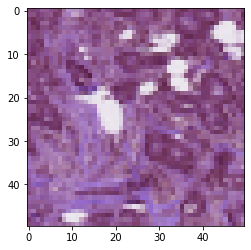

In [4]:
img = cv2.imread(yes_path + '\\8867_idx5_x1101_y1101_class1.png')
plt.imshow(img)
print(img.shape)

(50, 50, 3)


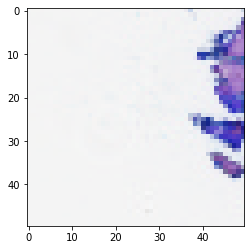

In [30]:
img = cv2.imread(no_path + '\\8867_idx5_x51_y601_class0.png')
plt.imshow(img)
print(img.shape)

In [31]:
vals = [yes_path, no_path]
classes = ['yes', 'no']
filepath = []
labels = []
for i, j in zip(vals, classes):
  filelist = os.listdir(i)
  print(filelist)
  for name in filelist:
    x = os.path.join(i,name)
    filepath.append(x)
    labels.append(j)
print(filepath.__len__(), labels.__len__())    

['8867_idx5_x1001_y1001_class1.png', '8867_idx5_x1001_y1051_class1.png', '8867_idx5_x1001_y1101_class1.png', '8867_idx5_x1001_y1151_class1.png', '8867_idx5_x1001_y1201_class1.png', '8867_idx5_x1001_y1251_class1.png', '8867_idx5_x1001_y1301_class1.png', '8867_idx5_x1001_y1351_class1.png', '8867_idx5_x1001_y851_class1.png', '8867_idx5_x1001_y901_class1.png', '8867_idx5_x1001_y951_class1.png', '8867_idx5_x1051_y1001_class1.png', '8867_idx5_x1051_y1051_class1.png', '8867_idx5_x1051_y1101_class1.png', '8867_idx5_x1051_y1151_class1.png', '8867_idx5_x1051_y1201_class1.png', '8867_idx5_x1051_y1251_class1.png', '8867_idx5_x1051_y1301_class1.png', '8867_idx5_x1051_y851_class1.png', '8867_idx5_x1051_y901_class1.png', '8867_idx5_x1051_y951_class1.png', '8867_idx5_x1101_y1001_class1.png', '8867_idx5_x1101_y1051_class1.png', '8867_idx5_x1101_y1101_class1.png', '8867_idx5_x1101_y1151_class1.png', '8867_idx5_x1101_y1201_class1.png', '8867_idx5_x1101_y1251_class1.png', '8867_idx5_x1101_y901_class1.png'

In [32]:
filepath[0:5]

['D:/Deep Learning Assignment/archive/8867/1\\8867_idx5_x1001_y1001_class1.png',
 'D:/Deep Learning Assignment/archive/8867/1\\8867_idx5_x1001_y1051_class1.png',
 'D:/Deep Learning Assignment/archive/8867/1\\8867_idx5_x1001_y1101_class1.png',
 'D:/Deep Learning Assignment/archive/8867/1\\8867_idx5_x1001_y1151_class1.png',
 'D:/Deep Learning Assignment/archive/8867/1\\8867_idx5_x1001_y1201_class1.png']

In [33]:
labels[0:5]

['yes', 'yes', 'yes', 'yes', 'yes']

In [34]:
labels[-5:]

['no', 'no', 'no', 'no', 'no']

In [35]:
datazipping =list(zip(filepath, labels))
pathframe = pd.DataFrame(datazipping, columns=['filepath', 'labels'])

In [36]:
pathframe.head()

,filepath,labels
0,D:/Deep Learning Assignment/archive/8867/1\886...,yes
1,D:/Deep Learning Assignment/archive/8867/1\886...,yes
2,D:/Deep Learning Assignment/archive/8867/1\886...,yes
3,D:/Deep Learning Assignment/archive/8867/1\886...,yes
4,D:/Deep Learning Assignment/archive/8867/1\886...,yes


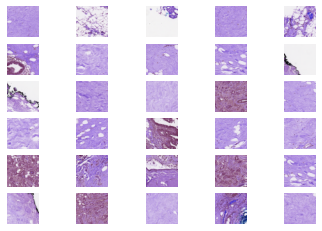

In [37]:
for i in range (0, 30):
  vals = np.random.randint(1, len(pathframe))
  plt.subplot(6,5, i+1)
  plt.imshow(cv2.imread(pathframe.filepath[vals]))
  plt.axis('off')
plt.show()  

In [38]:
Train, Test = train_test_split(pathframe, train_size = 0.90, random_state=42)
Train_new, valid = train_test_split(Train, train_size=0.90 ,random_state=42)
print(Train.shape, Train_new.shape, valid.shape, Test.shape)

(1477, 2) (1329, 2) (148, 2) (165, 2)


In [39]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

TRAIN DATASET

In [40]:
train_datagen = ImageDataGenerator(rescale=1/255, rotation_range=40,  width_shift_range=0.1, height_shift_range=0.1, shear_range=0.1, zoom_range=0.1, horizontal_flip=True, vertical_flip =True)

test_datagen = ImageDataGenerator(rescale=1/255)

In [41]:
train_gen =  train_datagen.flow_from_dataframe(dataframe=Train_new, x_col='filepath', y_col='labels', batch_size=16, target_size=(200, 200) , class_mode='binary', shuffle=True)
test_gen = test_datagen.flow_from_dataframe(dataframe=Test, x_col='filepath', y_col='labels', batch_size=16, target_size=(200,200), class_mode='binary', shuffle=True )
valid_gen = train_datagen.flow_from_dataframe(dataframe=valid, x_col='filepath', y_col='labels', batch_size=16, target_size=(200,200), class_mode='binary', shuffle=True)

Found 1329 validated image filenames belonging to 2 classes.
Found 165 validated image filenames belonging to 2 classes.
Found 148 validated image filenames belonging to 2 classes.


In [42]:
print(train_gen[0][0].shape)

(16, 200, 200, 3)


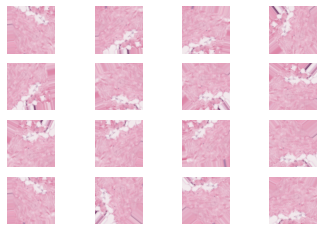

In [43]:
for i in range (0,16):
  val = train_gen[0][0][0]
  vals = val.astype('uint8')
  plt.subplot(4,4,i+1)
  plt.imshow(val)
  plt.axis('off')
plt.show()  

Creating Our Model

In [44]:
base_moodel = tf.keras.applications.InceptionResNetV2(input_shape = (200,200,3), include_top=False)
model = Sequential()
model.add(base_moodel)
model.add(GlobalAveragePooling2D())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))


In [45]:
callbacks = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience =2, min_delta=0.01)

In [46]:
model.compile(loss='binary_crossentropy', optimizer= 'adam', metrics=['accuracy'])
model.fit(train_gen, validation_data=valid_gen, epochs=5, verbose=1)

Epoch 1/5
84/84 [==============================] - 809s 9s/step - loss: 0.1965 - accuracy: 0.9308 - val_loss: 735.7999 - val_accuracy: 0.9122
Epoch 2/5
84/84 [==============================] - 801s 10s/step - loss: 0.1199 - accuracy: 0.9601 - val_loss: 0.1430 - val_accuracy: 0.9595
Epoch 3/5
84/84 [==============================] - 789s 9s/step - loss: 0.1187 - accuracy: 0.9586 - val_loss: 0.1319 - val_accuracy: 0.9662
Epoch 4/5
84/84 [==============================] - 802s 10s/step - loss: 0.1261 - accuracy: 0.9549 - val_loss: 0.7932 - val_accuracy: 0.9595
Epoch 5/5
84/84 [==============================] - 759s 9s/step - loss: 0.1180 - accuracy: 0.9609 - val_loss: 0.1652 - val_accuracy: 0.9595


In [47]:
model.evaluate(test_gen)

11/11 [==============================] - 15s 1s/step - loss: 0.0844 - accuracy: 0.9636


[0.08437292277812958, 0.9636363387107849]